# Descubra quem fez o ENEM 2016 apenas para treino

![title](photo.jpeg)

### Definição do problema

O que é um aluno treineiro?

Os estudantes que ainda não completaram 18 anos ou que tem interesse em fazer a prova do ENEM apenas para testar os seus conhecimentos tem a opção de se inscreverem como "treineiro". Aqui o desafio é descobrir quais alunos se inscreveram para essa condição no ENEM 2016.

### Análise Exploratória

In [1]:
# Importação das bibliotecas:

# Manipulação de dados.
import pandas as pd
import numpy as np

# Visualização.
import matplotlib.pyplot as plt
import seaborn as sns

# Processamento de dados.
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Machine Learning.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Métricas de avaliação do modelo preditivo.
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Ignorar mensagens de aviso.
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Leitura dos arquivos e instanciar os datasets:
df_train = pd.read_csv('train.csv', sep="," , encoding="UTF8")
df_test = pd.read_csv('test.csv', sep="," , encoding="UTF8")

In [3]:
# Dimensões dos datasets:
print("Dimesão do dataset de treino:\nLinhas: {}\nColunas: {}".format(df_train.shape[0], df_train.shape[1]))
print("Dimesão do dataset de teste:\nLinhas: {}\nColunas: {}".format(df_test.shape[0], df_test.shape[1]))

Dimesão do dataset de treino:
Linhas: 13730
Colunas: 167
Dimesão do dataset de teste:
Linhas: 4570
Colunas: 43


In [4]:
# Visualização das primeiras linhas.
df_train.head(3)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A


In [5]:
df_test.head(3)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D


In [6]:
df_train.shape[1] - df_test.shape[1]

124

Com base nos dados observados, já é possível fazer uma primeira limpeza nos datasets:

In [7]:
# Salvando uma cópia do dataset original.
df_train_original = df_train.copy()
df_test_original = df_test.copy()

In [8]:
# Manter as variáveis do dataset de treino comuns ao dataset de teste.
# Ainda, o dataset de treino manterá a variável "IN_TREINEIRO" (variável target).
cols = list(set(df_train.columns).intersection(set(df_test.columns)))
cols.append('IN_TREINEIRO')
df_train = df_train[cols].copy()
print("Atualizando: \nNúmero de variáveis no dataset de treino: {}".format(df_train.shape[1]))
print("Número de variáveis no dataset de teste: {}".format(df_test.shape[1]))

Atualizando: 
Número de variáveis no dataset de treino: 44
Número de variáveis no dataset de teste: 43


In [9]:
# Olhando para as variáveis que restaram.
df_train.columns

Index(['TP_ENSINO', 'IN_CEGUEIRA', 'IN_DISCALCULIA', 'IN_IDOSO', 'Q027',
       'CO_UF_RESIDENCIA', 'TP_ST_CONCLUSAO', 'NU_IDADE', 'SG_UF_RESIDENCIA',
       'IN_GESTANTE', 'TP_PRESENCA_CH', 'NU_NOTA_COMP2', 'Q026', 'Q024',
       'Q047', 'NU_INSCRICAO', 'TP_ANO_CONCLUIU', 'Q002', 'IN_DISLEXIA',
       'Q025', 'TP_PRESENCA_LC', 'TP_ESCOLA', 'IN_SURDEZ', 'TP_PRESENCA_MT',
       'NU_NOTA_COMP1', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_COMP3',
       'NU_NOTA_CN', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'Q001',
       'TP_PRESENCA_CN', 'TP_SEXO', 'TP_NACIONALIDADE', 'NU_NOTA_COMP4',
       'Q006', 'TP_COR_RACA', 'NU_NOTA_COMP5', 'TP_DEPENDENCIA_ADM_ESC',
       'NU_NOTA_REDACAO', 'IN_SABATISTA', 'IN_BAIXA_VISAO', 'IN_TREINEIRO'],
      dtype='object')

In [10]:
# Deletar as variáveis que representam códigos:
df_train = df_train.drop(['CO_UF_RESIDENCIA', 'NU_INSCRICAO'], axis = 1)
df_test = df_test.drop(['CO_UF_RESIDENCIA', 'NU_INSCRICAO'], axis = 1)
print("Atualizando: \nNúmero de variáveis no dataset de treino: {}".format(df_train.shape[1]))
print("Número de variáveis no dataset de teste: {}".format(df_test.shape[1]))

Atualizando: 
Número de variáveis no dataset de treino: 42
Número de variáveis no dataset de teste: 41


###### Analisando o balanceamentos das classes da variável target:

De acordo com o dicionário dos dados, IN_TREINEIRO = 1 indica que o aluno se inscreveu para essa condição e, o contrário quando IN_TREINEIRO = 0.

In [11]:
df_train.groupby('IN_TREINEIRO').size()

IN_TREINEIRO
0    11947
1     1783
dtype: int64

In [12]:
print("Porcentagem de alunos treineiros: {} %".format(round(df_train[df_train["IN_TREINEIRO"]==1].shape[0]/df_train.shape[0],2)*100))
print("Porcentagem de alunos não treineiros: {} %".format(round(df_train[df_train["IN_TREINEIRO"]==0].shape[0]/df_train.shape[0],2)*100))

Porcentagem de alunos treineiros: 13.0 %
Porcentagem de alunos não treineiros: 87.0 %


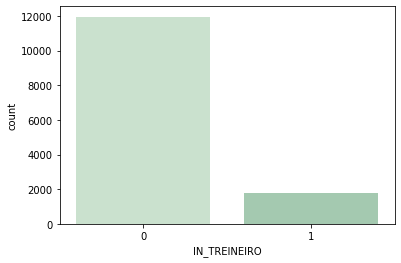

In [13]:
sns.countplot(df_train.IN_TREINEIRO, palette = sns.color_palette("ch:2.5,-.2,dark=.3"))

Aqui percebe-se que as classes da variável target estão desbalanceadas - há uma predominâcia de estudantes não treineiros (87%) e isso pode fazer com que o modelo preditivo aprenda muito sobre essa classe e não consiga fazer boas previsões sobre a classe dos estudantes que se inscreveram para treino. Portanto, ao processar os dados, usarei técnicas para o balanceamento dessa classe.

###### Analisando os dados faltantes

In [14]:
df_missing = pd.DataFrame({'Missing_values': round((df_train.isna().sum()/df_train.shape[0])*100,2)})

In [15]:
# Variáveis com dados ausentes.
df_missing[df_missing['Missing_values']>0]

,Missing_values
TP_ENSINO,68.81
Q027,53.70
NU_NOTA_COMP2,26.20
NU_NOTA_COMP1,26.20
NU_NOTA_LC,26.20
NU_NOTA_CH,24.68
NU_NOTA_COMP3,26.20
NU_NOTA_CN,24.68
TP_STATUS_REDACAO,26.20
NU_NOTA_COMP4,26.20


In [16]:
# Variáveis com mais de 50% de dados ausentes.
df_missing[df_missing['Missing_values']>50]

,Missing_values
TP_ENSINO,68.81
Q027,53.70
TP_DEPENDENCIA_ADM_ESC,68.81


#### Tipos dos dados

Aqui podemos visualizar a natureza das variáveis intepretada pelo Python.

In [17]:
df_types = pd.DataFrame({'data_type': df_train.dtypes})

In [18]:
# Variáveis do tipo float.
df_types[df_types['data_type']=='float64']

,data_type
TP_ENSINO,float64
NU_NOTA_COMP2,float64
NU_NOTA_COMP1,float64
NU_NOTA_LC,float64
NU_NOTA_CH,float64
NU_NOTA_COMP3,float64
NU_NOTA_CN,float64
TP_STATUS_REDACAO,float64
NU_NOTA_COMP4,float64
NU_NOTA_COMP5,float64


In [19]:
# Variáveis do tipo inteiro.
df_types[df_types['data_type']=='int']

,data_type
IN_CEGUEIRA,int64
IN_DISCALCULIA,int64
IN_IDOSO,int64
TP_ST_CONCLUSAO,int64
NU_IDADE,int64
IN_GESTANTE,int64
TP_PRESENCA_CH,int64
TP_ANO_CONCLUIU,int64
IN_DISLEXIA,int64
TP_PRESENCA_LC,int64


In [20]:
# Variáveis do tipo object.
df_types[df_types['data_type']=='object']

,data_type
Q027,object
SG_UF_RESIDENCIA,object
Q026,object
Q024,object
Q047,object
Q002,object
Q025,object
Q001,object
TP_SEXO,object
Q006,object


Pode acontecer de algumas variáveis não estarem classificadas adequadamente, mas esse método (dtypes) já nos dá uma breve noção do tipo dos dados.

### Preparação dos dados

###### Tratando os valores ausentes

Aqui decido por remover as variáveis com mais de 50% de valores ausentes e as demais decido por preenchê-las com "-1".

In [21]:
# Remoção das variáveis com mais de 50% de dados faltantes
var = df_missing[df_missing['Missing_values']>50].index.to_list()

df_train.drop(columns= var, inplace=True)
df_test.drop(columns= var, inplace=True)

print("Atualizando: \nNúmero de variáveis no dataset de treino: {}".format(df_train.shape[1]))
print("Número de variáveis no dataset de treino: {}".format(df_test.shape[1]))

Atualizando: 
Número de variáveis no dataset de treino: 39
Número de variáveis no dataset de treino: 38


In [22]:
# Preenchendo os demais valores faltantes com (-1).
df_train.fillna(-1, inplace=True)
df_test.fillna(-1, inplace=True)

In [23]:
# Verificando se ainda há valores ausentes.
print(f"Valores vazios no dados de Treino: {df_train.isna().sum().sum()}")
print(f"Valores vazios no dados de Teste: {df_test.isna().sum().sum()}")

Valores vazios no dados de Treino: 0
Valores vazios no dados de Teste: 0


##### Definição das variáveis preditoras e da variável target

In [24]:
# Dados de entrada e saída
features = df_train.drop(columns="IN_TREINEIRO").columns.to_list()
target = ['IN_TREINEIRO']

###### Codificar as variáveis categóricas

In [25]:
# Separando as features categóricas e numéricas.
cat_initials = ["CO", "SG", "TP", "IN", "Q0"]

cat_features = [i for i in df_train[features].columns if i[:2] in cat_initials]

num_features = df_train[features].columns.drop(cat_features)

In [26]:
# Codificar as variáveis categóricas.

# One Hot Encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', dtype=np.int)

#Treinamento.
ohe.fit(df_train[cat_features])

# Codificando o dataset de treino.
df_train_encoded = ohe.transform(df_train[cat_features])
df_train_encoded = pd.DataFrame(df_train_encoded, columns=ohe.get_feature_names(cat_features))
df_train_encoded = pd.concat([df_train_encoded, df_train[num_features].reset_index(drop=True)], axis=1)

# Codificando o dataset de teste.
df_test_encoded = ohe.transform(df_test[cat_features])
df_test_encoded = pd.DataFrame(df_test_encoded, columns=ohe.get_feature_names(cat_features))
df_test_encoded = pd.concat([df_test_encoded, df_test[num_features].reset_index(drop=True)], axis=1)

In [27]:
df_train_encoded.shape

(13730, 156)

###### Balanceando a variável target

Aqui eu decido fazer o balanceamento pela técnica **oversampling**: criação de dados sintéticos da classe minoritária. Assim, eu evito de perder dados ao fazer o balanceamento.

In [28]:
import imblearn

In [29]:
# Atualizando as features.
features_new = df_train_encoded.columns.to_list()

In [30]:
# Dimensão do dataset antes do oversampling
df_train_encoded.shape

(13730, 156)

In [31]:
# Balanceador SMOTE
# Aqui escolho sampling_strategy="minority" para a criação de dados sintéticos para a classe minoritária (oversampling)
smote_bal = SMOTE(sampling_strategy="minority")

# Aplicando o balanceador
features_train_balanced, target_balanced = smote_bal.fit_resample(df_train_encoded, df_train[target])

In [32]:
# Dimensão do dataset depois do oversampling
features_train_balanced.shape

(23894, 156)

#### Modelo Preditivo

##### Criar uma amostra para validação do modelo

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features_train_balanced, target_balanced, test_size=0.20)

In [34]:
# Criando o modelo.
classifier = RandomForestClassifier()
# Treinamento do modelo.
classifier.fit(X_train, y_train)
# Predições para a avaliação do modelo.
predict_validation = classifier.predict(X_test)

##### Avaliação do modelo

In [35]:
# Cross Validation
cross_val = cross_val_score(classifier, X_test, y_test)
print("Cross-Validation: %.2f%%" % (cross_val.mean() * 100))

accuracy = accuracy_score(y_test, predict_validation)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Cross-Validation: 99.64%
Acurácia: 99.77%


O modelo apresentou uma boa performance com os dados que usei para avliá-lo, posso então usá-lo para fazer previsões sobre os alunos do dataset de teste.

#### Resposta final

In [36]:
# Predições.
predictions = classifier.predict(df_test_encoded)

In [37]:
# Computando a resposta.
df_answer = pd.DataFrame({"NU_INSCRICAO": df_test_original["NU_INSCRICAO"], "IN_TREINEIRO": predictions})
answer = df_answer.set_index("NU_INSCRICAO")

In [38]:
answer.head(3)

,IN_TREINEIRO
NU_INSCRICAO,
ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
177f281c68fa032aedbd842a745da68490926cd2,0
6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1


In [39]:
# Salvando o arquivo.
answer.to_csv("answer.csv")

### O score atingido na sumbissão foi 99.76%